In [1]:
import os
import gc
import re
import urllib.request

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
from rasterio.warp import transform
import pandas as pd
import xarray as xr
import xesmf as xe

from dask.diagnostics import ProgressBar
from distributed import Client


In [2]:
client = Client()
client

/home/sami/miniconda3/envs/sci/lib/python3.8/site-packages/distributed/node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46135 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:46135/status,
Dashboard: http://127.0.0.1:46135/status,Workers: 6
Total threads: 24,Total memory: 125.77 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34695,Workers: 6
Dashboard: http://127.0.0.1:46135/status,Total threads: 24
Started: Just now,Total memory: 125.77 GiB
Comm: tcp://127.0.0.1:37041,Total threads: 4
Dashboard: http://127.0.0.1:42111/status,Memory: 20.96 GiB
Nanny: tcp://127.0.0.1:34981,


In [37]:
# get the file list of geotifs to mosaic
import fnmatch
flist = []
for file_name in os.listdir("../../../data_general/proc_sif-optim/"):
    if fnmatch.fnmatch(file_name, 'myd11a1_2018-*'):
#         print(file_name)
        flist.append("../../../data_general/proc_sif-optim/"+file_name)
flist.sort()
flist

distributed.utils_perf - WARNING - full garbage collections took 36% CPU time recently (threshold: 10%)


['../../../data_general/proc_sif-optim/myd11a1_2018-0000000000-0000000000.tif',
 '../../../data_general/proc_sif-optim/myd11a1_2018-0000000000-0000001280.tif',
 '../../../data_general/proc_sif-optim/myd11a1_2018-0000000000-0000002560.tif',
 '../../../data_general/proc_sif-optim/myd11a1_2018-0000000000-0000003840.tif',
 '../../../data_general/proc_sif-optim/myd11a1_2018-0000000000-0000005120.tif',
 '../../../data_general/proc_sif-optim/myd11a1_2018-0000000000-0000006400.tif',
 '../../../data_general/proc_sif-optim/myd11a1_2018-0000001280-0000000000.tif',
 '../../../data_general/proc_sif-optim/myd11a1_2018-0000001280-0000001280.tif',
 '../../../data_general/proc_sif-optim/myd11a1_2018-0000001280-0000002560.tif',
 '../../../data_general/proc_sif-optim/myd11a1_2018-0000001280-0000003840.tif',
 '../../../data_general/proc_sif-optim/myd11a1_2018-0000001280-0000005120.tif',
 '../../../data_general/proc_sif-optim/myd11a1_2018-0000001280-0000006400.tif',
 '../../../data_general/proc_sif-optim/m

In [38]:
def reshape_grid(da):
    # Compute the lon/lat coordinates with rasterio.warp.transform
    ny, nx = len(da['y']), len(da['x'])
    x, y = np.meshgrid(da['x'], da['y'])

    # Rasterio works with 1D arrays
    lon, lat = transform(da.crs, {'init': 'EPSG:4326'},
                         x.flatten(), y.flatten())
    lon = np.asarray(lon).reshape((ny, nx))
    lat = np.asarray(lat).reshape((ny, nx))
    da.coords['lon'] = (('y', 'x'), lon)
    da.coords['lat'] = (('y', 'x'), lat)
    da = da.drop_vars(("x","y"))
    return da

In [39]:
d1 = reshape_grid(xr.open_rasterio(flist[0],chunks=-1).rename("lst").astype('float16'))

distributed.utils_perf - WARNING - full garbage collections took 36% CPU time recently (threshold: 10%)


distributed.utils_perf - WARNING - full garbage collections took 36% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 36% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 36% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 35% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 35% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 35% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 35% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 35% CPU time recently (threshold: 10%)


distributed.utils_perf - WARNING - full garbage collections took 35% CPU time recently (threshold: 10%)


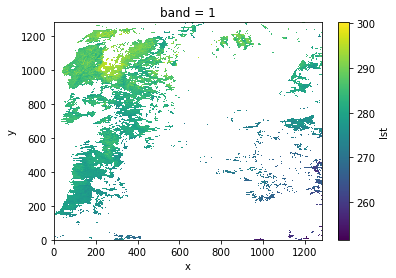

In [41]:
d1.isel(band=0).plot()

In [43]:
d1['lat']

<xarray.DataArray 'lat' (y: 1280, x: 1280)>
array([[49.38488274, 49.38488274, 49.38488274, ..., 49.38488274,
        49.38488274, 49.38488274],
       [49.37589959, 49.37589959, 49.37589959, ..., 49.37589959,
        49.37589959, 49.37589959],
       [49.36691644, 49.36691644, 49.36691644, ..., 49.36691644,
        49.36691644, 49.36691644],
       ...,
       [37.91339657, 37.91339657, 37.91339657, ..., 37.91339657,
        37.91339657, 37.91339657],
       [37.90441341, 37.90441341, 37.90441341, ..., 37.90441341,
        37.90441341, 37.90441341],
       [37.89543026, 37.89543026, 37.89543026, ..., 37.89543026,
        37.89543026, 37.89543026]])
Coordinates:
    lon      (y, x) float64 -124.7 -124.7 -124.7 -124.7 ... -113.3 -113.3 -113.2
    lat      (y, x) float64 49.38 49.38 49.38 49.38 ... 37.9 37.9 37.9 37.9
Dimensions without coordinates: y, x

In [7]:
# Compute the lon/lat coordinates with rasterio.warp.transform
ny, nx = len(da['y']), len(da['x'])
x, y = np.meshgrid(da['x'], da['y'])

# Rasterio works with 1D arrays
lon, lat = transform(da.crs, {'init': 'EPSG:4326'},
                     x.flatten(), y.flatten())
lon = np.asarray(lon).reshape((ny, nx))
lat = np.asarray(lat).reshape((ny, nx))
da.coords['lon'] = (('y', 'x'), lon)
da.coords['lat'] = (('y', 'x'), lat)

In [24]:
da.coords

Coordinates:
  * band     (band) int64 1 2 3 4 5 6 7 8 9 ... 357 358 359 360 361 362 363 364
  * y        (y) float64 49.38 49.38 49.37 49.36 49.35 ... 37.92 37.91 37.9 37.9
  * x        (x) float64 -124.7 -124.7 -124.7 -124.7 ... -113.3 -113.3 -113.2
    lon      (y, x) float64 -124.7 -124.7 -124.7 -124.7 ... -113.3 -113.3 -113.2
    lat      (y, x) float64 49.38 49.38 49.38 49.38 ... 37.9 37.9 37.9 37.9

In [28]:
da = da.drop_vars(("x","y"))

NameError: name 'dask' is not defined

In [35]:
d1 = xr.open_rasterio('../../../data_general/proc_sif-optim/myd11a1_2018_epsg32662_reg-sw-0000000000-0000000000.tif')

distributed.utils_perf - WARNING - full garbage collections took 35% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 35% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 35% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 35% CPU time recently (threshold: 10%)


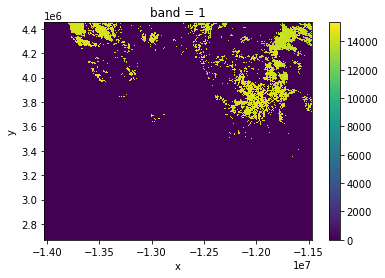

In [36]:
d1.isel(band=0).plot()